In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import joblib
from pso import calculate_profit, generate_particle_list, feasible_vec, demand, supply, dims, prod_cap, split_particles_list, rs, dims
from graph import SupplyChain
import random

In [2]:
np.set_printoptions(suppress=True)

## Generate particles

Reduced demand

In [3]:
# particle_list3 = generate_particle_list(2000)

In [4]:
# joblib.dump(particle_list3, 'particle_list3')

Reduced supply

## Equillibrium  

In [5]:
# demand = sc.get_demand_vec()
# supply = sc.get_total_supply()
# profit = calculate_profit(demand, sup_cha=sc)
# profit -> 636366.0

## Reduced demand

In [6]:
# reduced_demand_filled = rd.fill_order()
# reduced_demand_profit = calculate_profit(reduced_demand_filled, rd)
# reduced_demand_profit -> 572729.4

## Reduced supply

In [7]:
reduced_supply_filled = rs.fill_order()
reduced_supply_profit = calculate_profit(reduced_supply_filled, rs)
reduced_supply_profit

469510.0

In [8]:
total_eggs_supplied = rs.get_supplied_eggs(reduced_supply_filled)
total_eggs_supplied

810000.0

In [9]:
np.sum(demand)

101970

In [10]:
dem_vec = rs.get_demand_vec()
sup_boxes = rs.get_boxes(dem_vec)
total_supply = rs.get_total_supply()

In [11]:
reduced_supply_split = np.split(reduced_supply_filled, len(rs.products))
type(reduced_supply_split)

list

In [12]:
rs.products

{'P1': 6, 'P2': 10, 'P3': 12}

In [13]:
fa = {
    'F1': {'Category': 'Large', 'Location': 'North', 'Qty': 100000, 'Cost': 0.22, 'products':['P1', 'P2', 'P3']},
    'F2': {'Category': 'Large', 'Location': 'South', 'Qty': 100000, 'Cost': 0.22, 'products':['P1', 'P2']}
    }

In [14]:
cus = {
    'C1': {'Category': 'Large', 'Location': 'South'},
    'C2': {'Category': 'Large', 'Location': 'North'},
    'C3': {'Category': 'Large', 'Location': 'South'}
}

In [15]:
dem = {'P1':{'C1': 6600,'C2': 5500,'C3': 6600,},'P2':{'C1': 600,'C2': 500,'C3': 600,},'P3':{'C1': 600,'C2': 500,'C3': 600,}}

In [16]:
# for product in self.products.keys():
#         for customer in self.customers.keys():
#             self.graph[product][customer]['demand'] = self.demand[product][customer]
rs.products

{'P1': 6, 'P2': 10, 'P3': 12}

In [17]:
G = nx.DiGraph()
# G.add_nodes_from([(k,v) for k,v in fa.items()])
# G.add_nodes_from([(k,v) for k,v in cus.items()])
# G.add_nodes_from([(farm+"_"+product, {'eggs_per_box':rs.products[product]}) for farm in fa.keys() for product in fa[farm]['products']])

G.add_edges_from((farm, farm+"_"+product)for farm in fa.keys() for product in fa[farm]['products'])
# G.add_edges_from([(farm+"_"+product, c)for farm in fa.keys() for product in fa[farm]['products'] for c in cus.keys()])
G.add_edges_from([(cust+"_"+prod, cust) for cust in cus.keys() for prod in rs.products.keys()])

In [18]:
G.nodes

NodeView(('F1', 'F1_P1', 'F1_P2', 'F1_P3', 'F2', 'F2_P1', 'F2_P2', 'C1_P1', 'C1', 'C1_P2', 'C1_P3', 'C2_P1', 'C2', 'C2_P2', 'C2_P3', 'C3_P1', 'C3', 'C3_P2', 'C3_P3'))

In [19]:
# Randomly assign products to customers
# for farm in fa.keys():
#     for product in fa[farm]['products']:
#         for c in cus.keys():
#             G[farm+"_"+product][c]['quantity']= np.random.randint(0,10)           

In [20]:
for farm in fa.keys():
    for product in fa[farm]['products']:
        G[farm][farm+"_"+product]['quantity']= np.random.randint(0,10)

In [21]:
# prod_edges = []
# for cust in cus.keys():
#     for prod in rs.products.keys():
#         for farm in fa.keys():
#             for product in fa[farm]['products']:
#                 if prod == product:
#                     print(farm+"_"+product, cust+"_"+prod)
#                     prod_edges.append((farm+"_"+product, cust+"_"+prod))
#                     G[farm+"_"+product][cust+"_"+prod]['quantity']=np.random.randint(0,10)
#                 else: continue

In [22]:
def edges_fprod_cprod() -> list:
    prod_edges = []
    for customer in cus.keys():
        for product in rs.products.keys():
            for farm in fa.keys():
                for prod in fa[farm]['products']:
                    if product == prod:
                        prod_edges.append((farm + "_" + prod, customer + "_" + product))
    return prod_edges


In [24]:
# edges_f_prod_c_prod()

In [26]:
# G.add_edges_from(edges_f_prod_c_prod())

In [27]:
def set_supply_quantity() -> None:
    ''' Takes values from dict(self.farms) and puts it into the graph as edges'''
    for farm in fa.keys():
        G[farm][self.dealer]['qty_supplied']=self.farms[farm]['Qty']


In [28]:
# Get edge labels for plotting
edge_att = nx.get_edge_attributes(G, 'quantity')

In [29]:
demT = {'C1':{'P1':6600, 'P2':600, 'P3':600}, 'C2':{'P1':5500, 'P2':500, 'P3':500}, 'C3':{'P1':6600, 'P2':600, 'P3':600}}
demT

{'C1': {'P1': 6600, 'P2': 600, 'P3': 600},
 'C2': {'P1': 5500, 'P2': 500, 'P3': 500},
 'C3': {'P1': 6600, 'P2': 600, 'P3': 600}}

In [30]:
edge_att

{('F1', 'F1_P1'): 2,
 ('F1', 'F1_P2'): 3,
 ('F1', 'F1_P3'): 4,
 ('F2', 'F2_P1'): 7,
 ('F2', 'F2_P2'): 2}

In [31]:
def get_farm_supply(graph):
    return [graph[farm][prod]['quantity'] for farm in fa.keys() for prod in graph.successors(farm)]
        

In [32]:
get_farm_supply(G)

[2, 3, 4, 7, 2]

In [33]:
def get_prod_supplied(graph):
    return [graph[prod][cust]['quantity'] for farm in fa.keys() for prod in graph.successors(farm) for cust in graph.successors(prod)]

In [34]:
# get_prod_supplied(G)

In [35]:
def get_customer_supply(graph):
    return [((cust, prod)) for cust in cus.keys() for prod in graph.predecessors(cust)]

In [36]:
demT

{'C1': {'P1': 6600, 'P2': 600, 'P3': 600},
 'C2': {'P1': 5500, 'P2': 500, 'P3': 500},
 'C3': {'P1': 6600, 'P2': 600, 'P3': 600}}

In [37]:
def set_demand_cprod():
    for cust in cus.keys():
        for prod in rs.products.keys():
            G.nodes[cust + "_" + prod]['demand'] = demT[cust][prod] 

In [38]:
set_demand_cprod() 


In [39]:
for d in demT.keys():
    for p in rs.products.keys():
        print(demT[d][p])

6600
600
600
5500
500
500
6600
600
600


In [40]:
get_customer_supply(G)

[('C1', 'C1_P1'),
 ('C1', 'C1_P2'),
 ('C1', 'C1_P3'),
 ('C2', 'C2_P1'),
 ('C2', 'C2_P2'),
 ('C2', 'C2_P3'),
 ('C3', 'C3_P1'),
 ('C3', 'C3_P2'),
 ('C3', 'C3_P3')]

In [41]:
G.nodes(data=True)

NodeDataView({'F1': {}, 'F1_P1': {}, 'F1_P2': {}, 'F1_P3': {}, 'F2': {}, 'F2_P1': {}, 'F2_P2': {}, 'C1_P1': {'demand': 6600}, 'C1': {}, 'C1_P2': {'demand': 600}, 'C1_P3': {'demand': 600}, 'C2_P1': {'demand': 5500}, 'C2': {}, 'C2_P2': {'demand': 500}, 'C2_P3': {'demand': 500}, 'C3_P1': {'demand': 6600}, 'C3': {}, 'C3_P2': {'demand': 600}, 'C3_P3': {'demand': 600}})

In [42]:
[suc for suc in  G.successors('F1_P1')]

[]

In [43]:
#Node positions on graph
sc_pos = {'F1': (1, 7), 'F2': (1, 4),
            'F1_P1':(5,9),'F1_P2':(5,7), 'F1_P3':(5,5),'F2_P1':(5,3),'F2_P2':(5,1),
            'C1_P1':(7,10), 'C1_P2':(7,9), 'C1_P3':(7,8), 'C2_P1':(7,7), 'C2_P2':(7,6), 'C2_P3':(7,5), 'C3_P1':(7,4), 'C3_P2':(7,3), 'C3_P3':(7,2),
            'C1': (9,7), 'C2': (9,5), 'C3': (9,3)}

In [44]:
# Size the nodes
val_map_size = {
        'F1':900,'F2':900,
        'C1':900,'C2':900,'C3':900,
        'F1_P1':1000,'F1_P2':1000,'F1_P3':1000, 'F2_P1':1000, 'F2_P2':1000,
        'C1_P1':1000, 'C1_P2':1000, 'C1_P3':1000, 'C2_P1':1000, 'C2_P2':1000, 'C2_P3':1000, 'C3_P1':1000, 'C3_P2':1000, 'C3_P3':1000}
size = [val_map_size.get(node_col,'black') for node_col in G.nodes()]

In [45]:
# Color the nodes
val_map = {
        'F1':'limegreen','F2':'limegreen',
        'C1':'skyblue','C2':'skyblue','C3':'skyblue',
        'F1_P1':'salmon','F1_P2':'salmon','F1_P3':'salmon', 'F2_P1':'salmon', 'F2_P2':'salmon',
        'C1_P1':'green', 'C1_P2':'green', 'C1_P3':'green', 'C2_P1':'green', 'C2_P2':'green', 'C2_P3':'green', 'C3_P1':'green', 'C3_P2':'green', 'C3_P3':'green'}

col = [val_map.get(node_col,'black') for node_col in G.nodes()]

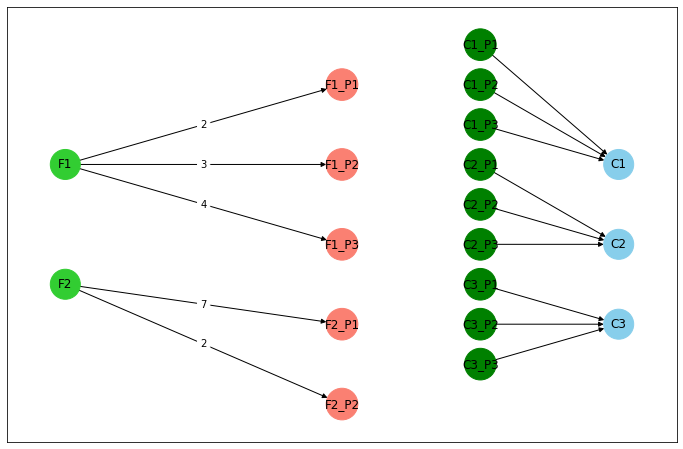

In [46]:
# Draw graph
fig, ax = plt.subplots(figsize=(12,8))
nx.draw_networkx(G, node_size = size, pos=sc_pos, node_color= col, arrows=True)
nx.draw_networkx_edge_labels(G, pos=sc_pos, edge_labels=edge_att, rotate=False)
# ax.set_xlim(0,1)
# ax.set_ylim(0,1)
plt.show()

In [47]:
xls = pd.ExcelFile('data_ex.xlsx')
demand_df = pd.read_excel(xls, sheet_name='demand', index_col=0, usecols="A:D", nrows=33)  
prices_df = pd.read_excel(xls, sheet_name = 'prices', index_col=0, usecols="A:D", nrows=33) 
custs = pd.read_excel(xls, sheet_name='customers', index_col=0, usecols="A:C", nrows=33).to_dict('index')
farms_dict = pd.read_excel(xls, sheet_name='farms', index_col=0, usecols="A:F", nrows=31).to_dict('index')
# farms_df = pd.read_excel(xls, sheet_name='farms', index_col=0, usecols="A:F", nrows=31)
products_dict = {'P1': 6, 'P2': 10, 'P3': 12}
# transport_cost_per_egg = {'North':0.10, 'South':0.15}


In [48]:
for farm in farms_dict.keys():
    farms_dict[farm]['Products'] = farms_dict[farm]['Products'].split(', ')


In [49]:
def edges_fprod_cprod() -> list:
    prod_edges = []
    for customer in custs.keys():
        for product in products_dict.keys():
            for farm in farms_dict.keys():
                for prod in farms_dict[farm]['Products']:
                    if product == prod:
                        prod_edges.append((farm + "_" + prod, customer + "_" + product))
    return prod_edges


In [50]:
edges_fprod_cprod()

[('F1_P1', 'C1_P1'),
 ('F2_P1', 'C1_P1'),
 ('F3_P1', 'C1_P1'),
 ('F4_P1', 'C1_P1'),
 ('F5_P1', 'C1_P1'),
 ('F6_P1', 'C1_P1'),
 ('F7_P1', 'C1_P1'),
 ('F8_P1', 'C1_P1'),
 ('F9_P1', 'C1_P1'),
 ('F10_P1', 'C1_P1'),
 ('F11_P1', 'C1_P1'),
 ('F12_P1', 'C1_P1'),
 ('F14_P1', 'C1_P1'),
 ('F15_P1', 'C1_P1'),
 ('F1_P2', 'C1_P2'),
 ('F2_P2', 'C1_P2'),
 ('F3_P2', 'C1_P2'),
 ('F4_P2', 'C1_P2'),
 ('F5_P2', 'C1_P2'),
 ('F6_P2', 'C1_P2'),
 ('F7_P2', 'C1_P2'),
 ('F8_P2', 'C1_P2'),
 ('F9_P2', 'C1_P2'),
 ('F10_P2', 'C1_P2'),
 ('F11_P2', 'C1_P2'),
 ('F12_P2', 'C1_P2'),
 ('F13_P2', 'C1_P2'),
 ('F1_P3', 'C1_P3'),
 ('F2_P3', 'C1_P3'),
 ('F3_P3', 'C1_P3'),
 ('F4_P3', 'C1_P3'),
 ('F5_P3', 'C1_P3'),
 ('F6_P3', 'C1_P3'),
 ('F7_P3', 'C1_P3'),
 ('F8_P3', 'C1_P3'),
 ('F9_P3', 'C1_P3'),
 ('F13_P3', 'C1_P3'),
 ('F14_P3', 'C1_P3'),
 ('F15_P3', 'C1_P3'),
 ('F1_P1', 'C2_P1'),
 ('F2_P1', 'C2_P1'),
 ('F3_P1', 'C2_P1'),
 ('F4_P1', 'C2_P1'),
 ('F5_P1', 'C2_P1'),
 ('F6_P1', 'C2_P1'),
 ('F7_P1', 'C2_P1'),
 ('F8_P1', 'C2_P1'),
 

In [51]:
farms_dict['F1']['Products']

['P1', 'P2', 'P3']